In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Use pipeline format to get kmeans clusters

- makes the preprocessing steps easy to manage
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

In [5]:
numerical_cols =['age','hypertension','heart_disease','bmi']
categorical_cols = ['gender','ever_married','Residence_type','work_type','smoking_status', 'stroke']

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
numerical_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean")),("scaler", StandardScaler())])

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_cols),
        ("num", numerical_pipe, numerical_cols),
    ]
)

pipe_kmeans = Pipeline(
    steps=[("preprocess", preprocessing), ("kmeans", KMeans(n_clusters=5,random_state=0))]
)



pipe_kmeans.fit(df)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'Residence_type',
                                                   'work_type',
                                                   'smoking_status',
                                                   'stroke']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                     

In [8]:
pipe_kmeans.named_steps

{'preprocess': ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['gender', 'ever_married', 'Residence_type',
                                   'work_type', 'smoking_status', 'stroke']),
                                 ('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['age', 'hypertension', 'heart_disease',
                                   'bmi'])]),
 'kmeans': KMeans(n_clusters=5, random_state=0)}

In [7]:
# Get the feature names after processing
ohe = pipe_kmeans.named_steps["preprocess"].named_transformers_["cat"]
feature_names = ohe.get_feature_names(categorical_cols)
kmeans_cols = np.r_[feature_names,numerical_cols]

## access the kmeans object
- get the cluster centroids

In [9]:
pipe_kmeans['kmeans'].cluster_centers_

array([[ 6.74224344e-01,  3.25775656e-01, -1.08420217e-19,
         2.51789976e-01,  7.48210024e-01,  4.73747017e-01,
         5.26252983e-01,  1.46778043e-01,  2.38663484e-03,
         7.21957041e-01,  1.24105012e-01,  4.77326969e-03,
         1.98090692e-01,  1.89737470e-01,  4.30787589e-01,
         1.81384248e-01,  9.74940334e-01,  2.50596659e-02,
         1.28300042e-02, -3.16530987e-01, -2.38946800e-01,
         1.47406417e+00],
       [ 5.70765661e-01,  4.29234339e-01,  5.42101086e-20,
         9.74477958e-02,  9.02552204e-01,  5.01160093e-01,
         4.98839907e-01,  1.46171694e-01,  1.73472348e-18,
         5.54524362e-01,  2.99303944e-01,  2.77555756e-17,
         1.06728538e-01,  2.29698376e-01,  4.82598608e-01,
         1.80974478e-01,  8.77030162e-01,  1.22969838e-01,
         7.97563032e-01,  3.04319637e+00, -2.38946800e-01,
         4.65238228e-01],
       [ 6.03153153e-01,  3.96846847e-01,  0.00000000e+00,
         6.08108108e-02,  9.39189189e-01,  4.90540541e-01,
    

# look at the cluster centroids in a dataframe
- It's hard to interpret the centroids, because there's scaling plus one hot encoding of the features

In [215]:
pd.DataFrame(pipe_kmeans['kmeans'].cluster_centers_,columns=kmeans_cols)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_0,stroke_1,age,hypertension,heart_disease,bmi
0,0.603705,0.396295,-5.421011e-20,0.061003,0.938997,0.489833,0.510167,0.171713,8.673617e-19,0.618165,...,0.206507,0.215093,0.400813,0.177587,0.943516,0.056484,0.471662,-0.328602,-0.238947,-0.167134
1,0.570766,0.429234,2.710505e-20,0.097448,0.902552,0.501160,0.498840,0.146172,8.673617e-19,0.554524,...,0.106729,0.229698,0.482599,0.180974,0.877030,0.122970,0.797563,3.043196,-0.238947,0.465238
2,0.671395,0.328605,-5.421011e-20,0.250591,0.749409,0.475177,0.524823,0.146572,2.364066e-03,0.722222,...,0.196217,0.190307,0.432624,0.180851,0.975177,0.024823,0.008798,-0.316645,-0.238947,1.464879
3,0.409420,0.590580,0.000000e+00,0.115942,0.884058,0.485507,0.514493,0.130435,1.734723e-18,0.572464,...,0.173913,0.278986,0.326087,0.221014,0.829710,0.170290,1.103994,0.453264,4.185032,0.162792
4,0.543899,0.455357,7.440476e-04,0.994048,0.005952,0.504464,0.495536,0.040179,1.488095e-02,0.408482,...,0.615327,0.053571,0.253720,0.077381,0.997768,0.002232,-1.264645,-0.328602,-0.238947,-0.829516


In [10]:
## Take a closer look at the cluster composition
df['clusters'] = pipe_kmeans.predict(df)

In [11]:
df['clusters'].value_counts()

2    2220
3    1345
0     838
1     431
4     276
Name: clusters, dtype: int64

## we can access the cluster centers more directly by looking at the mean of the columns

In [12]:
df.groupby('clusters')[numerical_cols].mean()

,age,hypertension,heart_disease,bmi
clusters,,,,
0,43.516706,0.003580,0.0,40.239499
1,61.259861,1.000000,0.0,32.850769
2,53.829279,0.000000,0.0,27.568030
3,14.644610,0.000000,0.0,22.349580
4,68.188406,0.231884,1.0,30.316461


## Look at the clusters composition of various categorical columns

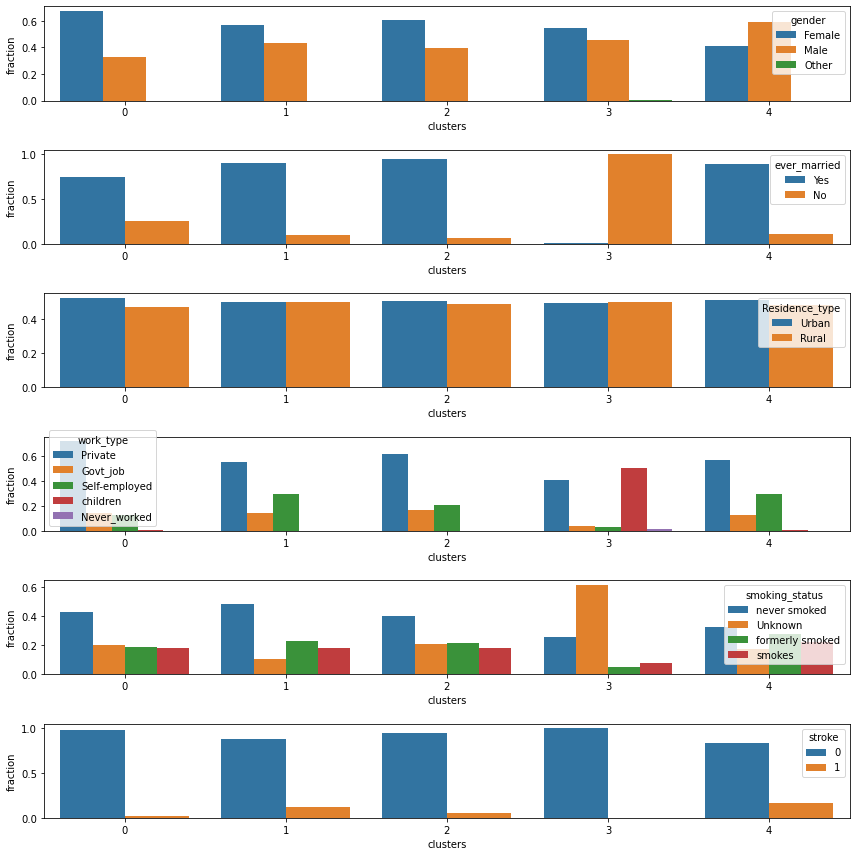

In [15]:
fig, ax = plt.subplots(6,1,figsize=(12,12))
for i,col in enumerate(categorical_cols):
    hmm = df.groupby('clusters')[col].value_counts(normalize=True).rename('fraction').reset_index()
    sns.barplot(x="clusters", y="fraction",hue=col, data=hmm,ax=ax[i])
    
plt.tight_layout()


Text(0.5, 1.0, 'Clusters in the bmi/age feature space')

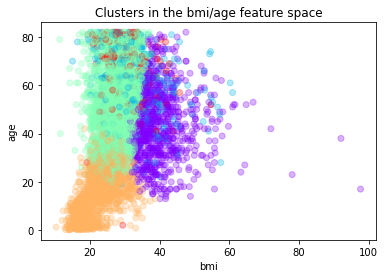

In [16]:
plt.scatter(x=df['bmi'], y=df['age'],  c= df['clusters'], cmap='rainbow',alpha=0.3 )
plt.xlabel("bmi")
plt.ylabel("age")
plt.title('Clusters in the bmi/age feature space')

## We chose 5 clusters randomly, how do we know the optimum k?

In [235]:
# take a look how to set params of the pipeline object direcly
pipe_kmeans.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['gender', 'ever_married', 'Residence_type',
                                     'work_type', 'smoking_status', 'stroke']),
                                   ('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['age', 'hypertension', 'heart_disease',
                                     'bmi'])])),
  ('kmeans', KMeans(n_clusters=5))],
 'verbose': False,
 'preprocess': ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['gender', 'ever_married', 'Residence_type',
                                   'work_type', 'smoking_status', 'stroke']),
                                 ('num',
                             

## Set the number of clusters directly
- we will be setting the value of `kmeans__n_clusters`

In [17]:
k = 10
inertia = []
silhouette_coefficients = []
for i in range(2,k):
    pipe_kmeans.set_params(kmeans__n_clusters=i).fit(df)
    inertia.append(pipe_kmeans['kmeans'].inertia_)
    scaled_features = pipe_kmeans.named_steps['preprocess'].fit_transform(df)
    score = silhouette_score(scaled_features, pipe_kmeans['kmeans'].labels_)
    silhouette_coefficients.append(score)
    

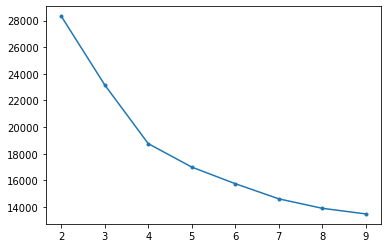

In [18]:
plt.plot(range(2,k),inertia,marker='.')

## Using elbow method on the inertia scores,
- The graph kinks the deepest at 4, so we choose 4 as the optimum k
- We could also look at silhouette scores


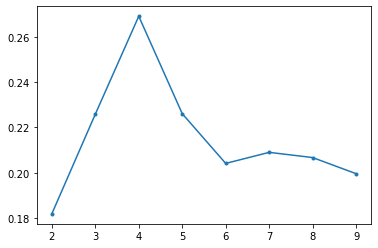

In [19]:
plt.plot(range(2,k),silhouette_coefficients,marker='.')

## For the silhouette scores...
- it looks like 4 is also best,as it is the highest score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


In [21]:
pipe_kmeans.set_params(kmeans__n_clusters=4).fit(df)
df['clusters_best'] = pipe_kmeans.predict(df)

Text(0, 0.5, 'age')

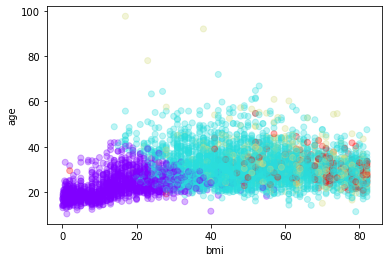

In [22]:
plt.scatter(x=df['age'], y=df['bmi'],  c= df['clusters_best'], cmap='rainbow',alpha=0.3 )
plt.xlabel("bmi")
plt.ylabel("age")

## We still see quite a bit of overlap 
- this is just a 2-d projection. We would have to cut the data on specific axes to see more definition
- for example a 3d plot shows something interesting

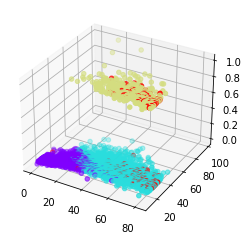

In [24]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(df['age'], df['bmi'], df['hypertension'], c= df['clusters_best'], cmap='rainbow')

## If you are interested in hierarchical clustering
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
- This takes a long time to run, so I sampled 1000 points
- You need to make a cut to determine the optimum number of clusters

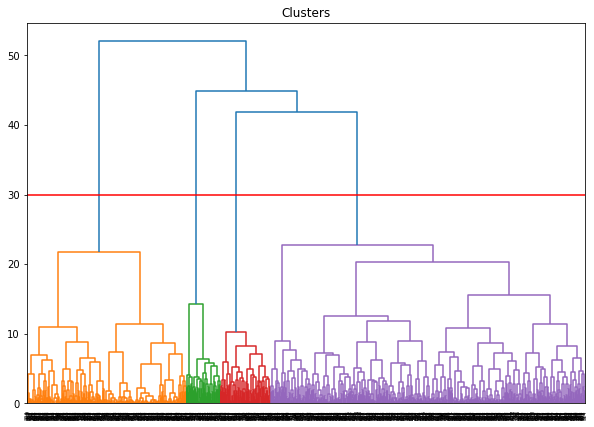

In [25]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Clusters")
cd = dendrogram(linkage(pipe_kmeans.named_steps['preprocess'].fit_transform(df.sample(1000)), method='ward'))
plt.axhline(y=30, color='r', linestyle='-')

In [27]:
from sklearn.datasets import load_wine

In [28]:
data = load_wine()

In [31]:
data['data'].shape

(178, 13)

In [32]:
from sklearn.datasets import fetch_openml

In [33]:
bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

In [34]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000,16.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,40.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,32.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,13.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,119.0
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,89.0
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014,90.0
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981,61.0


In [35]:
average_week_demand = df.groupby(["weekday", "hour"]).mean()["count"]

In [37]:
average_week_demand

weekday  hour
0.0      0.0      93.990385
         1.0      77.432692
         2.0      61.627451
         3.0      31.144231
         4.0       9.362745
                    ...    
6.0      19.0    239.932692
         20.0    180.865385
         21.0    156.000000
         22.0    139.663462
         23.0    115.855769
Name: count, Length: 168, dtype: float64

<AxesSubplot:xlabel='weekday,hour'>

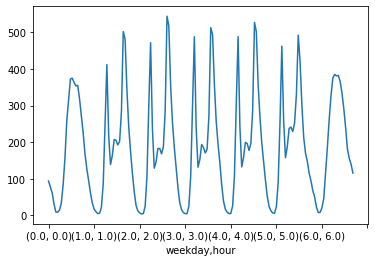

In [36]:
average_week_demand.plot()